#  La R√©gression Lin√©aire

Le but du TP est de mettre en oeuvre une r√©gression lin√©aire sur un exemple puis sur des donn√©es r√©elles. Pour cela, vous aurez besoin des formules du cours pour retrouver les coefficients permettant de calculer une r√©gression lin√©aire. 




## Ex. 1 : La r√©gression simple

1. Soit les couples d‚Äôobservations suivantes :

x| 18| 7 | 14| 31| 21|  5| 11| 16| 26| 29
-|---|---|---|---|---|---|---|---|---|---
y| 55| 17| 36| 85| 62| 18| 33| 41| 63| 87


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x=np.array([18, 7, 14, 31, 21, 5, 11, 16, 26, 29, 8])
y=np.array([55, 17, 36, 85, 62, 18, 33, 41, 63, 87, 2])

2. Tracer le graphique des couples $x$ et $y$. A partir de ce graphe, peut on soupconner une relation lin√©aire entre les variables $x$ et $y$ ?

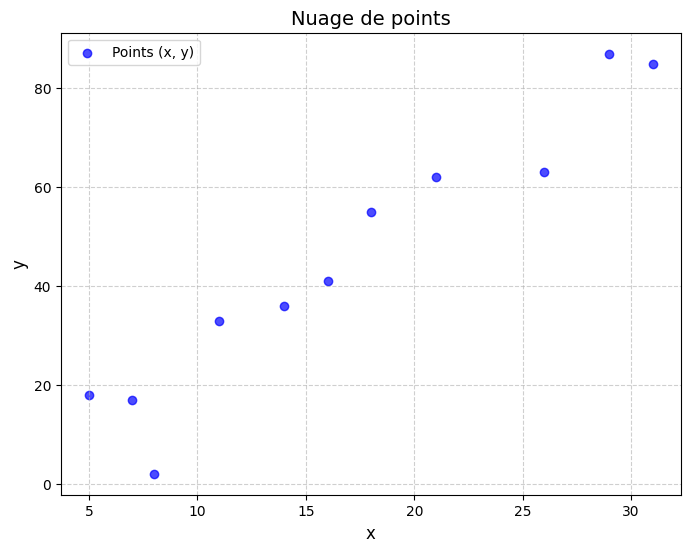

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Points (x, y)', alpha=0.7)
plt.title('Nuage de points', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

On peut soup√ßonner une relation lin√©aire entre les variables x et y. Premi√®rement de mani√®re graphique.En effet, les points semblent align√©s selon une tendance g√©n√©rale (mont√©e, une relation lin√©aire est donc possible.

3. D√©terminer pour ces observations la droite de r√©gression au sens des moindres carr√©s. Pour cela il faudra d√©terminer les coefficients a et b.

In [3]:
# Calcul des coefficients de la droite de r√©gression
n = len(x)
mean_x = np.mean(x) # Moyenne de x
mean_y = np.mean(y) # Moyenne de y

# Calcul de la pente (a) et de l'ordonn√©e √† l'origine (b)
numerator = np.sum((x - mean_x) * (y - mean_y))
denominator = np.sum((x - mean_x) ** 2)
a = numerator / denominator
b = mean_y - a * mean_x

print(f"Pente (a) : {a}")
print(f"Ordonn√©e √† l'origine (b) : {b}")

Pente (a) : 2.9649359406608227
Ordonn√©e √† l'origine (b) : -4.770734996628455


4. Tracez la droite de r√©gression sur les donn√©es.

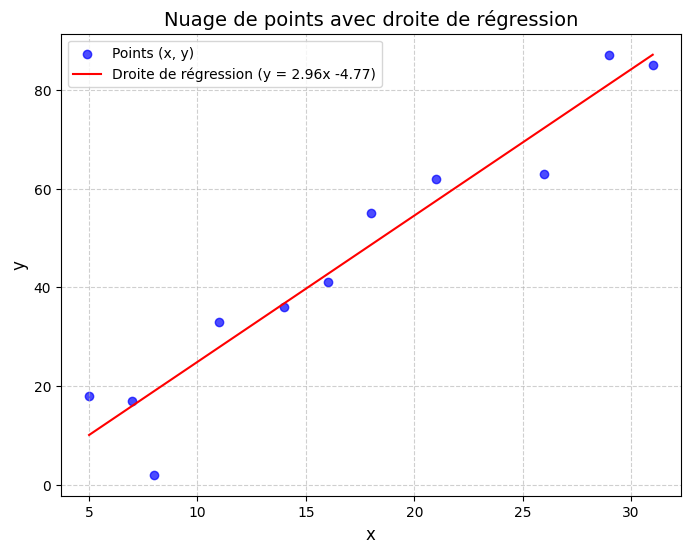

In [12]:
# Cr√©ation des points pour la droite de r√©gression
x_line = np.linspace(min(x), max(x), 100)
y_line = a * x_line + b

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Points (x, y)', alpha=0.7)
plt.plot(x_line, y_line, color='red', label=f'Droite de r√©gression (y = {a:.2f}x {b:.2f})')
plt.title('Nuage de points avec droite de r√©gression', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

5. Donner une estimation des erreurs $\epsilon_i,i=1,n$

In [6]:
# Calcul des valeurs pr√©dites
y_pred = a * x + b

# Calcul des erreurs (r√©sidus)
errors = y - y_pred

# Affichage des erreurs
for i, error in enumerate(errors, start=1):
    print(f"Erreur pour le point {i} (x={x[i-1]}, y={y[i-1]}): Œµ = {error:.2f}")


Erreur pour le point 1 (x=18, y=55): Œµ = 6.40
Erreur pour le point 2 (x=7, y=17): Œµ = 1.02
Erreur pour le point 3 (x=14, y=36): Œµ = -0.74
Erreur pour le point 4 (x=31, y=85): Œµ = -2.14
Erreur pour le point 5 (x=21, y=62): Œµ = 4.51
Erreur pour le point 6 (x=5, y=18): Œµ = 7.95
Erreur pour le point 7 (x=11, y=33): Œµ = 5.16
Erreur pour le point 8 (x=16, y=41): Œµ = -1.67
Erreur pour le point 9 (x=26, y=63): Œµ = -9.32
Erreur pour le point 10 (x=29, y=87): Œµ = 5.79
Erreur pour le point 11 (x=8, y=2): Œµ = -16.95


6. Calculer la moyenne empirique et la variance empirique des erreurs. Comparez la variance avec l'estimateur non biais√© de la variance donn√© par $s_y^2 = \frac{1}{n-1}\sum_{i=1}^n (y_i - \overline y)^2$

In [7]:
mean_errors = np.mean(errors)

# Variance empirique des erreurs
var_errors = np.var(errors, ddof=0)  # Variance empirique (ddof=0 pour diviser par n)

# Estimateur non biais√© de la variance de y (s_y^2)
mean_y = np.mean(y)
s_y_squared = np.sum((y - mean_y) ** 2) / (len(y) - 1)

print(f"Moyenne empirique des erreurs: {mean_errors}")
print(f"Variance empirique des erreurs: {var_errors}")
print(f"Estimateur non biais√© de la variance: {s_y_squared}")

Moyenne empirique des erreurs: 0.0
Variance empirique des erreurs: 51.59553730153868
Estimateur non biais√© de la variance: 767.8545454545455


7. Donner une estimation plausible de $y$ lorsque $x = 17$. Quel intervalle de confiance associer √† cette pr√©diction ?

In [ ]:
from scipy.stats import t

# x = 17
x_new = 17

# Pr√©diction pour x = 17
y_new = a * x_new + b

# Niveau de confiance
confidence = 0.95
n = len(x)
mean_x = np.mean(x)

# Variance empirique des r√©sidus
sigma_squared = np.var(errors, ddof=1)

# Facteur d'√©largissement pour l'intervalle de confiance
t_star = t.ppf(1 - (1 - confidence) / 2, df=n - 2)
se = np.sqrt(sigma_squared * (1 + 1 / n + ((x_new - mean_x) ** 2) / np.sum((x - mean_x) ** 2)))

# Calcul des bornes de l'intervalle
lower_bound = y_new - t_star * se
upper_bound = y_new + t_star * se

print(f"Estimation de y pour x = 17 : y = {y_new:.2f}")
print(f"Intervalle de confiance √† 95% : I = [{lower_bound:.2f}, {upper_bound:.2f}]")


Estimation de y pour x = 17 : y = 45.63
Intervalle de confiance √† 95% : I = [27.83, 63.43]


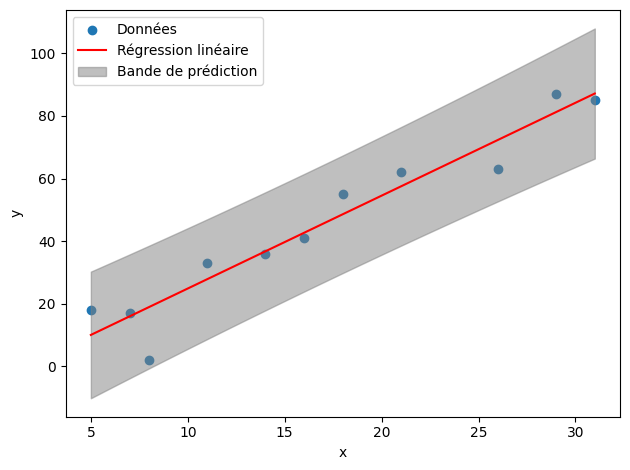

In [55]:
from scipy.optimize import curve_fit

confidence_level = 0.95

def regression_lineaire_prediction_bands(x, y, confidence_level):
    """
    Calcule une r√©gression lin√©aire et trace les bandes de confiance et de pr√©diction.

    Args:
        x: Tableau NumPy contenant les valeurs de la variable ind√©pendante.
        y: Tableau NumPy contenant les valeurs de la variable d√©pendante.
        confidence_level: Niveau de confiance pour les bandes (entre 0 et 1).

    Returns:
        None (affiche le graphique)
    """

    # Fonction de r√©gression lin√©aire
    def f(x, a, b):
        return a * x + b

    # Ajustement de la courbe
    popt, pcov = curve_fit(f, x, y)
    a, b = popt

    # Calcul des pr√©dictions sur une grille de points
    x_fit = np.linspace(np.min(x), np.max(x), 100)
    y_fit = f(x_fit, a, b)

    # Calcul des bandes de confiance et de pr√©diction
    n = len(x)
    df = n - 2
    t_value = t.ppf(1 - (1 - confidence_level) / 2, df)
    std_err = np.sqrt(np.sum((y - f(x, a, b))**2) / (n-2))
    std_pred = std_err * np.sqrt(1 + 1/n + (x_fit - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    y_upper = y_fit + t_value * std_pred
    y_lower = y_fit - t_value * std_pred

    # Affichage du graphique
    plt.scatter(x, y, label='Donn√©es')
    plt.plot(x_fit, y_fit, color='red', label='R√©gression lin√©aire')
    plt.fill_between(x_fit, y_lower, y_upper, alpha=0.5, color='gray', label='Bande de pr√©diction')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()

regression_lineaire_prediction_bands(x, y, confidence_level)

8. a) Donner une estimation plausible de y lorsque x = 48. Quel intervalle de confiance associer √† cette pr√©diction ?

In [54]:
# x = 48
x_new_2 = 48

# Pr√©diction pour x = 17
y_new = a * x_new_2 + b

# Niveau de confiance
confidence_2 = 0.95
n_2 = len(x)
mean_x_2 = np.mean(x)

# Variance empirique des r√©sidus
sigma_squared = np.var(errors, ddof=1)

# Facteur d'√©largissement pour l'intervalle de confiance
t_star = t.ppf(1 - (1 - confidence) / 2, df=n - 2)
se = np.sqrt(sigma_squared * (1 + 1 / n_2 + ((x_new_2 - mean_x_2) ** 2) / np.sum((x - mean_x_2) ** 2)))

# Calcul des bornes de l'intervalle
lower_bound = y_new - t_star * se
upper_bound = y_new + t_star * se

print(f"Estimation de y pour x = 48 : y = {y_new:.2f}")
print(f"Intervalle de confiance √† 95% : I = [{lower_bound:.2f}, {upper_bound:.2f}]")


Estimation de y pour x = 48 : y = 137.55
Intervalle de confiance √† 95% : I = [111.78, 163.31]


b) Comparez le avec le pr√©c√©dent


Lorsque ùë• = 17 l'intervalle de confiance est plus √©troit, ce qui signifie que la pr√©diction de y pour cette valeur de ùë•.

x est plus pr√©cise. Cela est d√ª √† la proximit√© de x = 17 √† la moyenne des x observ√©s dans les donn√©es, o√π l'incertitude du mod√®le est g√©n√©ralement plus faible.

En revanche, pour x = 48 l'intervalle de confiance est plus large, indiquant que la pr√©diction de y pour cette valeur est moins pr√©cise. Cela est souvent le cas lorsque x est √©loign√© de la moyenne des donn√©es utilis√©es pour ajuster le mod√®le.
Les intervalles de confiance sont plus larges dans ces zones √©loign√©es, car les incertitudes associ√©es aux pr√©dictions augmentent avec l'√©loignement de x par rapport √† la moyenne.

9. Une nouvelle observation nous est fournie : $x_{11} = 48$ et $y_{11} = 2$
    1. Que devient la droite de regression lin√©aire ?

[18  7 14 31 21  5 11 16 26 29  8]
[55 17 36 85 62 18 33 41 63 87  2]
Nouvelle pente (a) : 1.32
Nouvelle ordonn√©e √† l'origine (b) : 16.07
Equation de la droite : y = 1.32x - 16.07


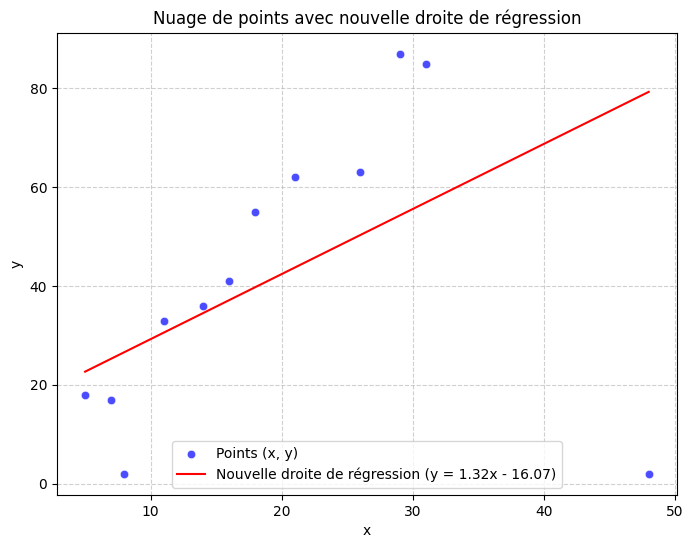

In [52]:
x_2=np.array([18, 7, 14, 31, 21, 5, 11, 16, 26, 29, 8, 48])
y_2=np.array([55, 17, 36, 85, 62, 18, 33, 41, 63, 87, 2, 2])

print(x)
print(y)

# Calcul des moyennes des x et y
x_mean_2 = np.mean(x_2)
y_mean_2 = np.mean(y_2)

# Calcul de la pente (a)
a_new = np.sum((x_2 - x_mean_2) * (y_2 - y_mean_2)) / np.sum((x - x_mean_2)**2)

# Calcul de l'ordonn√©e √† l'origine (b)
b_new = y_mean_2 - a_new * x_mean_2

# Affichage des r√©sultats de la nouvelle droite de r√©gression
print(f"Nouvelle pente (a) : {a_new:.2f}")
print(f"Nouvelle ordonn√©e √† l'origine (b) : {b_new:.2f}")
print(f"Equation de la droite : y = {a_new:.2f}x - {b_new:.2f}")

# Trace les points et la nouvelle droite de r√©gression
x_line = np.linspace(min(x_2), max(x_2), 100)
y_line = a_new * x_line + b_new

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_2, y=y_2, color='blue', label='Points (x, y)', alpha=0.7)
sns.lineplot(x=x_line, y=y_line, label=f'Nouvelle droite de r√©gression (y = {a_new:.2f}x - {b_new:.2f})', color='red')
plt.title('Nuage de points avec nouvelle droite de r√©gression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Cette droite est recalcul√©e en fonction des nouvelles moyennes de x et y, et des nouveaux coefficients de r√©gression a et b.

B. Quelle est l‚Äôinfluence de ce point sur cette droite ?

En effet, la valeur [48, 2] est assez √©loign√©e de la tendance g√©n√©rale (valeur "outlier") des donn√©es, a un effet significatif sur la pente de la droite. L'ajout de ce point tr√®s √©loign√© de la tendance g√©n√©rale modifie la pente et l'ordonn√©e √† l'origine de la droite.
Avant d'ajouter ce point, l'√©quation de droite √©tait de : y = 2.96x - 4.77. Avec l'ajout de [48, 2], la valeur de b a augment√© de mani√®re signifiante (avec -16.07). Le coefficient directeur de y est pass√© de 2.96 √† 1.32. La pente s'est donc l√©g√®rement √©cras√© horizontalement due √† la valeur de y11 = 2.

Conclusion : lorsque nous ajoutons un point aussi √©loign√© des autres dans l'espace des donn√©es, cela a pour effet de modifier la dispersion des points autour de la droite de r√©gression. En particulier, les points proches de la moyenne, c'est-√†-dire ceux qui √©taient initialement proches de la droite de r√©gression, apparaissent d√©sormais comme √©tant plus √©loign√©s de celle-ci.

B. Calculer le $R^2$ avant l'ajout de [48, 2]

In [69]:
y_mean = np.mean(y)

# Calcul de la somme des carr√©s totaux (√©cart total)
ecart_total = np.sum((y - y_mean) ** 2)

# Calcul de la somme des carr√©s r√©siduels (√©cart expliqu√©)
ecart_explique = np.sum((y - y_pred) ** 2)

# On calcule R¬≤
r_squared = 1 - (ecart_explique / ecart_total)

print(f"Le coefficient de d√©termination R¬≤ est : {r_squared:.4f}")

Le coefficient de d√©termination R¬≤ est : 0.9261


B. Calculer le $R^2$ apr√®s l'ajout de [48, 2]

In [73]:
# Calcul de la moyenne de y
y_mean_2 = np.mean(y_2)

y_pred_2 = a_new * x_2 + b_new

# Calcul de la somme des carr√©s totaux (√©cart total)
ecart_total_2 = np.sum((y_2 - y_mean_2) ** 2)

# Calcul de la somme des carr√©s r√©siduels (√©cart expliqu√©)
ecart_explique_2 = np.sum((y_2 - y_pred_2) ** 2)

# Calcul du R¬≤
r_squared_2 = 1 - (ecart_explique_2 / ecart_total_2)

print(f"Le coefficient de d√©termination R¬≤ est : {r_squared_2:.4f}")

Le coefficient de d√©termination R¬≤ est : 0.0130


##   Analyse de complexit√© via la DFA

Le but de ce second exercice est d'√©valuer la complexit√© de diff√©rents signaux par l'algorithme de la DFA




2. Coder l'algorithme de la DFA 

In [165]:
from scipy.stats import linregress

def DFA(signal, window_sizes):
    """
    Effectue l'analyse DFA sur un signal donn√©.

    Args:
        signal: Le signal d'entr√©e (un tableau NumPy 1D).
        window_sizes: Une liste de tailles de fen√™tre √† utiliser.

    Returns:
        Un tableau NumPy de fluctuations moyennes (F) pour chaque taille de fen√™tre.
        Un tableau NumPy des tailles de fen√™tre correspondantes.
    """
    X = np.cumsum(signal - np.mean(signal))  # Int√©gration du signal
    F = []
    for n in window_sizes:
        windows = [X[i:i + n] for i in range(0, len(X) - n, n)]
        F_n = []
        for window in windows:
            # Ajustement lin√©aire local (polyn√¥me d'ordre 1)
            slope, intercept, _, _, _ = linregress(np.arange(len(window)), window)
            trend = intercept + slope * np.arange(len(window))
            F_n.append(np.sqrt(np.mean((window - trend) ** 2)))  # Fluctuation
        F.append(np.mean(F_n))  # Fluctuation moyenne
    return np.array(F), np.array(window_sizes)

Interpr√©tation de l'exposant ùõº :
ùõº = 0.5 : Comportement similaire √† un bruit blanc (pas de corr√©lation).
ùõº > 0.5 : Le signal a des corr√©lations √† long terme, c'est-√†-dire qu'il est plus "persistent".
ùõº < 0.5 : Le signal pr√©sente une anti-corr√©lation, ou un comportement plus "contraignant".

Appliquer la DFA sur un bruit blanc gaussien  . Afficher les fluctuations puis la complexit√© $\alpha$

Alpha = 0.450412349569545


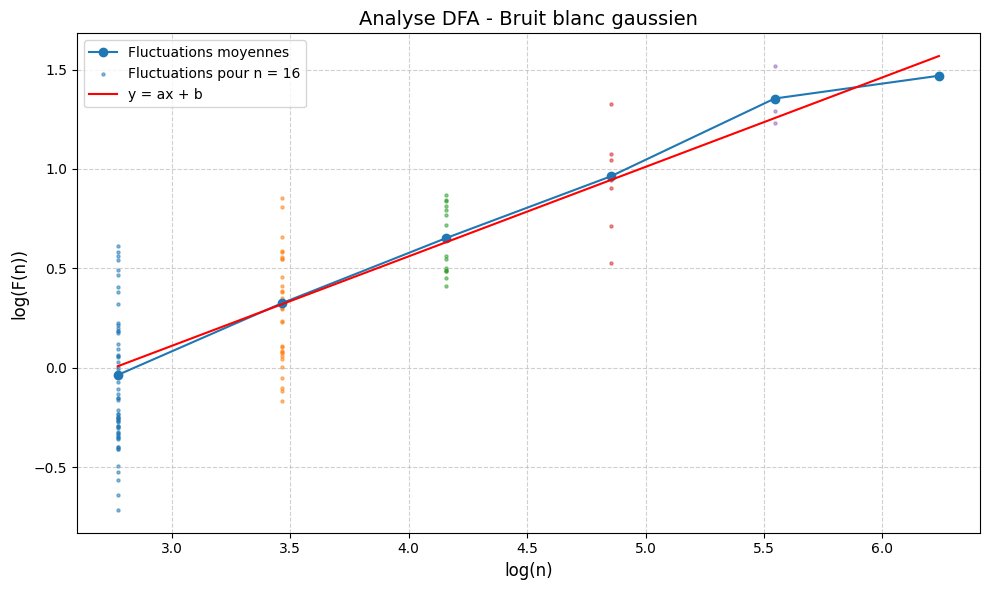

In [166]:
from scipy.stats import linregress

if __name__ == "__main__":
    # G√©n√©rer un bruit blanc gaussien
    np.random.seed(42)
    N = 1000  # Nombre de points
    white_noise = np.random.randn(N)  # Bruit blanc gaussien (moyenne nulle, √©cart-type 1)
    
    # D√©finir les tailles de fen√™tre pour l'analyse
    window_sizes = np.power(2, np.arange(4, 10))
    
    # Appliquer l'algorithme DFA
    F, n = DFA(white_noise, window_sizes)
    
    # Affichage des r√©sultats de l'analyse DFA
    plt.figure(figsize=(10, 6))

    # Tracer les fluctuations moyennes
    plt.plot(np.log(n), np.log(F), 'o-', label="Fluctuations moyennes")
    
    # Ajouter les fluctuations individuelles pour chaque taille de fen√™tre
    for i, n_i in enumerate(window_sizes):
        X = np.cumsum(white_noise - np.mean(white_noise))
        windows = [X[j:j + n_i] for j in range(0, len(X) - n_i, n_i)]
        F_n = []
        
        for window in windows:
            slope, intercept, _, _, _ = linregress(np.arange(len(window)), window)
            trend = intercept + slope * np.arange(len(window))
            F_n.append(np.sqrt(np.mean((window - trend) ** 2)))
        
        # Tracer les fluctuations individuelles pour chaque taille de fen√™tre
        plt.scatter([np.log(n_i)] * len(F_n), np.log(F_n), s=5, alpha=0.5, label=f"Fluctuations pour n = {n_i}" if i == 0 else "")

    # Calculer la pente (alpha) et l'ordonn√©e √† l'origine de la droite de r√©gression
    slope, intercept, _, _, _ = linregress(np.log(n), np.log(F))
    print("Alpha =", slope)
    
    # G√©n√©rer la droite de r√©gression y = ax + b
    x_line = np.log(n)  # Valeurs de x pour la droite
    y_line = slope * x_line + intercept  # Valeurs de y pour la droite
    
    # Affichage de la droite sur le graphique
    plt.plot(x_line, y_line, 'r-', label="y = ax + b")
    
    # Configuration du graphique
    plt.xlabel("log(n)", fontsize=12)
    plt.ylabel("log(F(n))", fontsize=12)
    plt.title("Analyse DFA - Bruit blanc gaussien", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Affichage
    plt.tight_layout()
    plt.show()
    

R√©aliser une √©tude de la complexit√© sur des signaux physiologiques Iris. Analyser les r√©sultats

In [122]:
import pandas as pd

iris_data = pd.read_csv('Iris.csv')

In [123]:
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [139]:
print(iris_data.info()) # Affiche les infos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [125]:
# Afficher des statistiques descriptives (pour examiner les valeurs num√©riques)

print(iris_data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


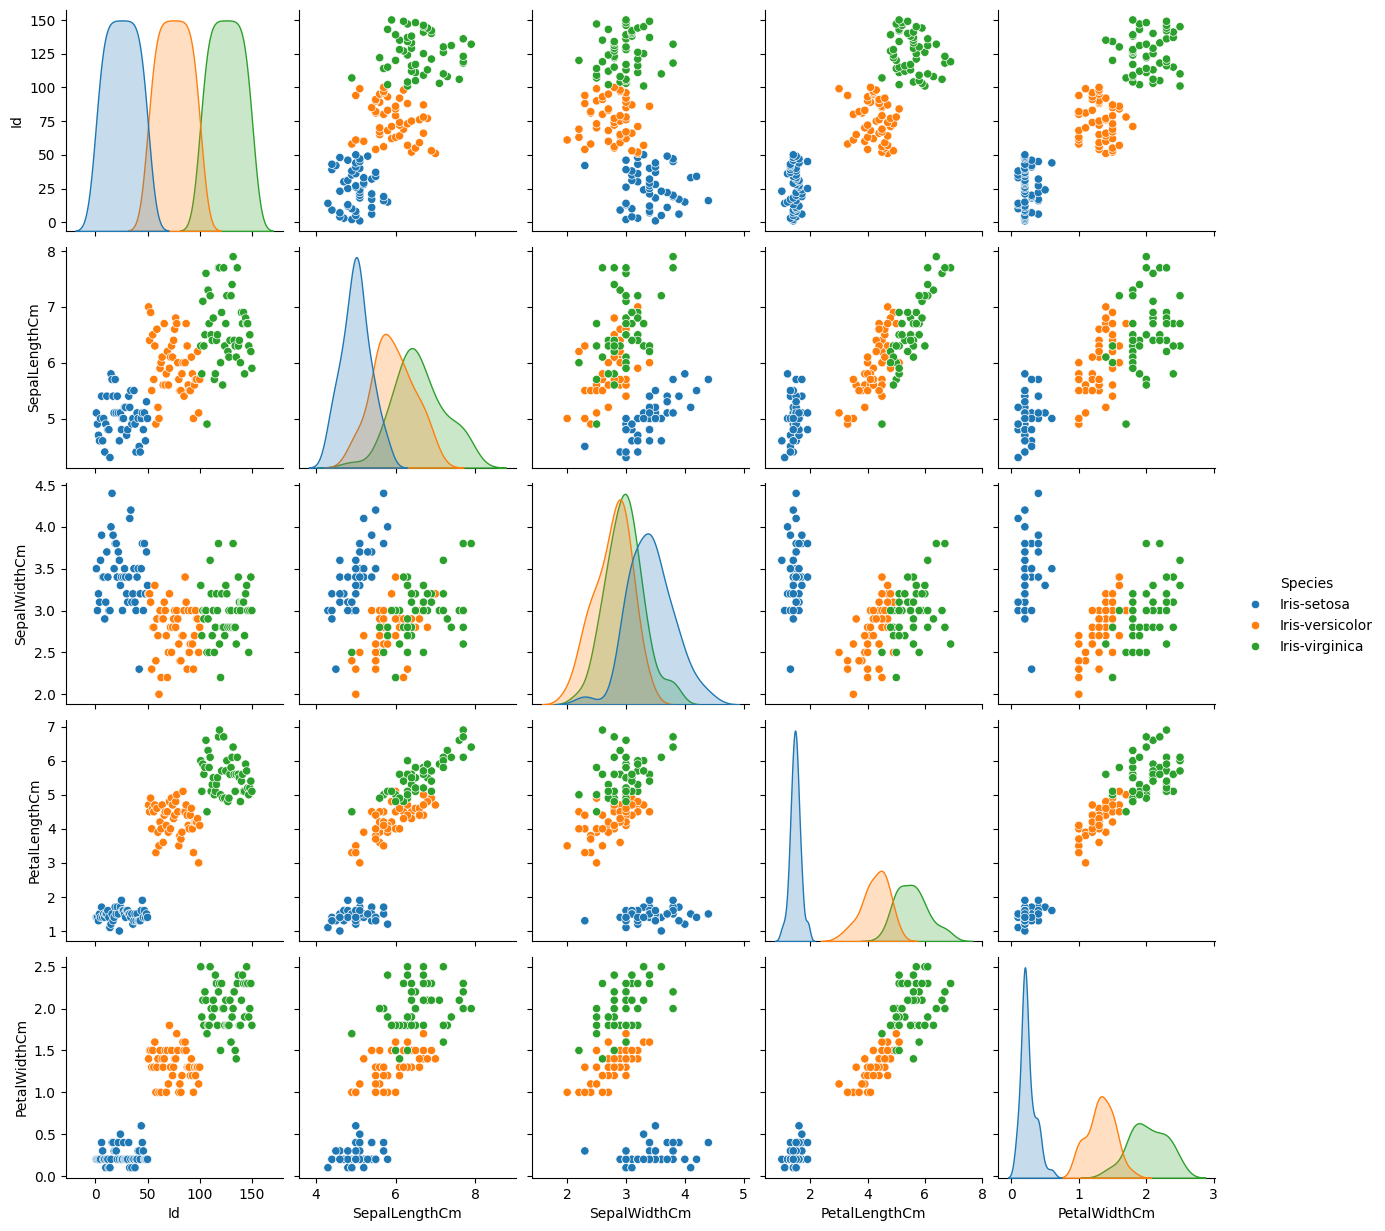

In [ ]:
# Afficher les "Species" avant ACP

import seaborn as sns

iris_df = iris_data.copy()
sns.pairplot(iris_df, hue="Species", diag_kind="auto")
plt.show()

On constate d√©j√† que "Petal Width" et "Petal Length" sont tr√®s corr√©l√©s. Et que pour tous les crit√®res, IRIS-SETOSA ne se m√©lange pas avec les autres.

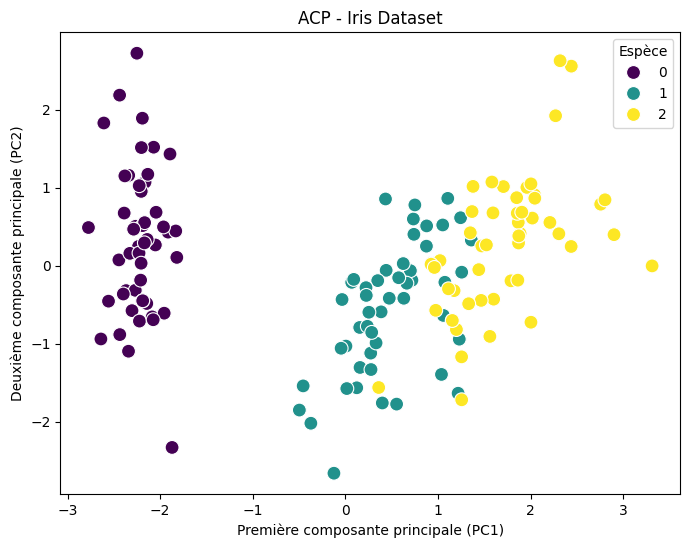

array([0.72770452, 0.23030523])

In [134]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

iris_df = pd.DataFrame(iris_data)

# Pr√©paration des donn√©es
iris_df = iris_df.drop(columns=["Id"])  # Supprimer la colonne Id
species_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
iris_df["Species"] = iris_df["Species"].map(species_mapping)  # Conversion en num√©rique

# S√©pare les caract√©ristiques et les cibles
features = iris_df.drop(columns=["Species"])
targets = iris_df["Species"]

# Standardisation des donn√©es
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Application de l'ACP
pca = PCA(n_components=2)  # R√©duire √† 2 composantes principales pour visualisation
principal_components = pca.fit_transform(features_scaled)

# Ajoute les composantes principales au DataFrame
principal_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
final_df = pd.concat([principal_df, targets.reset_index(drop=True)], axis=1)

# Visualisation des deux premi√®res composantes principales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_df, x="PC1", y="PC2", hue="Species", palette="viridis", s=100)
plt.title("ACP - Iris Dataset")
plt.xlabel("Premi√®re composante principale (PC1)")
plt.ylabel("Deuxi√®me composante principale (PC2)")
plt.legend(title="Esp√®ce")
plt.show()

# Retourne les r√©sultats pr√©liminaires de l'ACP
pca.explained_variance_ratio_


En r√©duisant sur 2 composantes principales, on confirme nos hypoth√®se; c'est √† dire que l'esp√®ce "S√©tosa" est tr√®s ind√©pendantes des autres.

Alpha = 0.7442982375453863


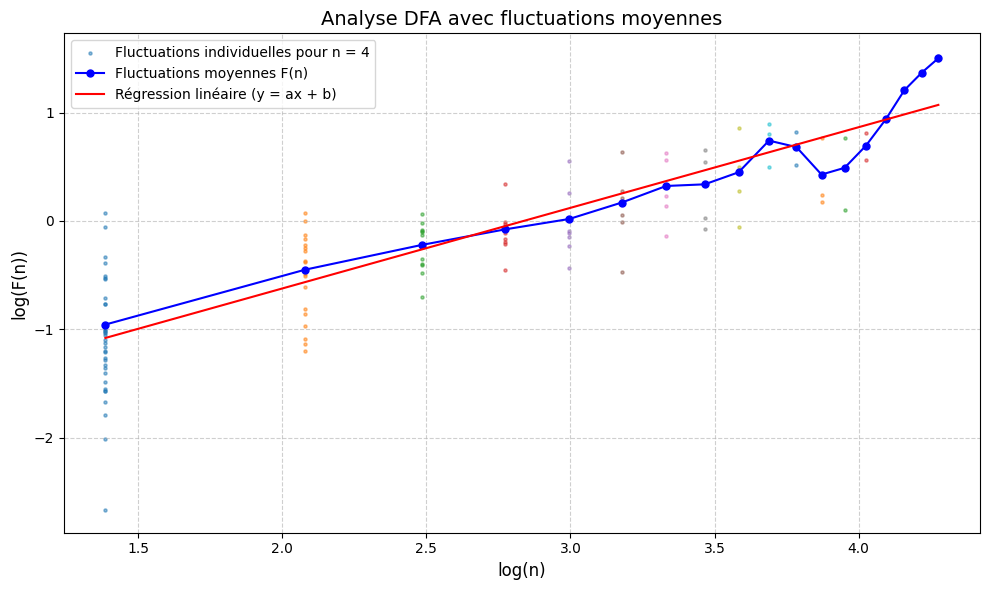

In [ ]:
# Signal de la seconde composante principale
num_compo = 1
signal = principal_components[:, num_compo]  # Premi√®re composante

# Application de DFA
window_sizes = np.arange(4, len(signal) // 2, 4)  # Tailles de fen√™tre entre 4 et un quart de la longueur du signal
F_2, sizes = DFA(signal, window_sizes)


# Initialisation du graphique
plt.figure(figsize=(10, 6))

# Ajoute les fluctuations individuelles pour chaque taille de fen√™tre
for i, n_i in enumerate(window_sizes):
    # Calcul du signal cumul√©
    X_2 = np.cumsum(signal - np.mean(signal))
    
    # D√©coupe en fen√™tres valides
    windows = [X_2[j:j + n_i] for j in range(0, len(X_2) - n_i + 1, n_i)]
    F_n = []
    
    # Calcul des fluctuations pour chaque fen√™tre
    for window in windows:
        # V√©rification : utiliser uniquement des fen√™tres de taille n_i
        if len(window) == n_i:
            slope, intercept, _, _, _ = linregress(np.arange(len(window)), window)
            trend = intercept + slope * np.arange(len(window))
            F_n.append(np.sqrt(np.mean((window - trend) ** 2)))
    
    # Trace les fluctuations individuelles pour chaque taille de fen√™tre
    plt.scatter([np.log(n_i)] * len(F_n), np.log(F_n), s=5, alpha=0.5, label=f"Fluctuations individuelles pour n = {n_i}" if i == 0 else "")

# Trace les fluctuations moyennes (F(n)) pour chaque taille de fen√™tre
# Old syntax -->plt.scatter(np.log(sizes), np.log(F_2), color='red', s=50, label="Fluctuations moyennes F(n)")
plt.plot(np.log(sizes), np.log(F_2), color='blue', marker='o', markersize=5, label="Fluctuations moyennes F(n)")


# Calculer la pente (alpha) et l'ordonn√©e √† l'origine de la droite de r√©gression
log_sizes = np.log(sizes)
log_F = np.log(F_2)
slope, intercept, _, _, _ = linregress(log_sizes, log_F)
print("Alpha =", slope)

# G√©n√©re la droite de r√©gression y = ax + b
x_line = np.linspace(min(log_sizes), max(log_sizes), 100)  # Valeurs de x pour la droite
y_line = slope * x_line + intercept  # Valeurs de y pour la droite

# Affichage de la droite sur le graphique
plt.plot(x_line, y_line, 'r-', label="R√©gression lin√©aire (y = ax + b)")

# Configuration du graphique
plt.xlabel("log(n)", fontsize=12)
plt.ylabel("log(F(n))", fontsize=12)
plt.title("Analyse DFA avec fluctuations moyennes", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Affichage
plt.tight_layout()
plt.show()

Alpha = 1.2292940329721265


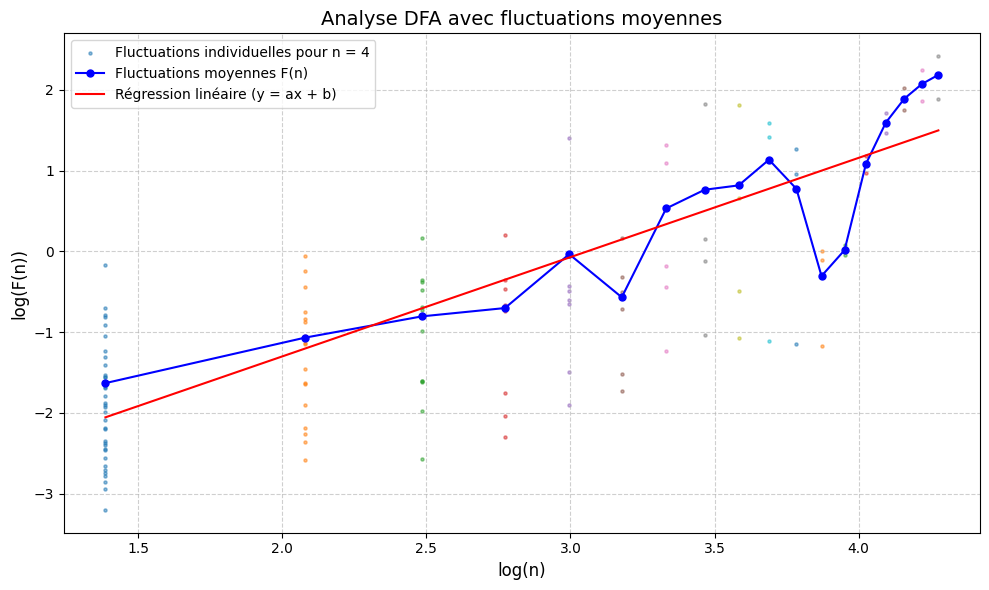

In [167]:
# Signal de la premi√®re composante principale
num_compo = 0
signal = principal_components[:, num_compo]  # Premi√®re composante

# Application de DFA
window_sizes = np.arange(4, len(signal) // 2, 4)  # Tailles de fen√™tre entre 4 et un quart de la longueur du signal
F_2, sizes = DFA(signal, window_sizes)


# Initialisation du graphique
plt.figure(figsize=(10, 6))

# Ajoute les fluctuations individuelles pour chaque taille de fen√™tre
for i, n_i in enumerate(window_sizes):
    # Calcul du signal cumul√©
    X_2 = np.cumsum(signal - np.mean(signal))
    
    # D√©coupe en fen√™tres valides
    windows = [X_2[j:j + n_i] for j in range(0, len(X_2) - n_i + 1, n_i)]
    F_n = []
    
    # Calcul des fluctuations pour chaque fen√™tre
    for window in windows:
        # V√©rification : utiliser uniquement des fen√™tres de taille n_i
        if len(window) == n_i:
            slope, intercept, _, _, _ = linregress(np.arange(len(window)), window)
            trend = intercept + slope * np.arange(len(window))
            F_n.append(np.sqrt(np.mean((window - trend) ** 2)))
    
    # Tracer les fluctuations individuelles pour chaque taille de fen√™tre
    plt.scatter([np.log(n_i)] * len(F_n), np.log(F_n), s=5, alpha=0.5, label=f"Fluctuations individuelles pour n = {n_i}" if i == 0 else "")

# Trace les fluctuations moyennes (F(n)) pour chaque taille de fen√™tre
# Old syntax --> plt.scatter(np.log(sizes), np.log(F_2), color='red', s=50, label="Fluctuations moyennes F(n)")
plt.plot(np.log(sizes), np.log(F_2), color='blue', marker='o', markersize=5, label="Fluctuations moyennes F(n)")


# Calcule la pente (alpha) et l'ordonn√©e √† l'origine de la droite de r√©gression
log_sizes = np.log(sizes)
log_F = np.log(F_2)
slope, intercept, _, _, _ = linregress(log_sizes, log_F)
print("Alpha =", slope)

# G√©n√©re la droite de r√©gression y = ax + b
x_line = np.linspace(min(log_sizes), max(log_sizes), 100)  # Valeurs de x pour la droite
y_line = slope * x_line + intercept  # Valeurs de y pour la droite

# Affichage de la droite sur le graphique
plt.plot(x_line, y_line, 'r-', label="R√©gression lin√©aire (y = ax + b)")

# Configuration du graphique
plt.xlabel("log(n)", fontsize=12)
plt.ylabel("log(F(n))", fontsize=12)
plt.title("Analyse DFA avec fluctuations moyennes", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Affichage
plt.tight_layout()
plt.show()

La premi√®re composante principale (PC1) est choisie comme signal d'entr√©e pour l'analyse DFA.

DFA :

Le signal est int√©gr√©.
Pour chaque taille de fen√™tre, un ajustement lin√©aire local est effectu√©.
Les fluctuations moyennes sont calcul√©es pour chaque fen√™tre.